## Reza Torabi 610300032

### 0. Reading Data
First we read the dataframe and see the first ten entries to have an understanding of what our data is and how it looks like. Then we check a quick summary of its major statistical information.

In [ ]:
df <- read.csv("/content/Churn(preprocessing).csv")
install.packages("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
df[1:10, ]

,State,Account.Length,Area.Code,Phone,Int.l.Plan,VMail.Plan,VMail.Message,Day.Mins,Day.Calls,Day.Charge,⋯,Eve.Calls,Eve.Charge,Night.Mins,Night.Calls,Night.Charge,Intl.Mins,Intl.Calls,Intl.Charge,CustServ.Calls,Churn.
,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<dbl>,<int>,<dbl>,⋯,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>,<dbl>,<int>,<chr>
1,KS,128,415,382-4657,yes,yes,24,265.3,110,45.0,⋯,99,17.0,245.0,NA,10.3,9.5,4,2.5,1,False.
2,OH,107,415,371-7191,no,yes,25,161.5,123,27.5,⋯,104,17.0,254.5,102,10.8,13.1,4,NA,1,False.
3,NJ,137,415,358-1921,no,no,-1,243.6,114,41.4,⋯,110,10.6,162.7,104,6.6,11.5,6,3.1,0,False.
4,OH,84,408,375-9999,no,no,-1,299.5,71,50.9,⋯,88,5.7,196.9,88,8.3,6.1,8,1.4,2,False.
5,OK,75,415,330-6626,no,no,-1,166.7,113,28.3,⋯,122,13.0,187.2,120,7.7,9.7,3,2.5,3,False.
6,AL,118,510,391-8027,no,no,NA,223.4,98,37.8,⋯,101,19.1,204.0,117,8.7,5.4,7,1.5,0,False.
7,MA,121,510,355-9993,no,yes,23,218.1,88,37.0,⋯,108,29.9,212.7,117,9.1,7.0,8,1.7,3,False.
8,MO,147,415,329-9001,no,no,-1,156.9,79,26.7,⋯,94,9.1,211.8,95,8.9,6.6,6,1.6,0,False.
9,LA,117,408,335-4719,no,no,-1,184.4,97,31.3,⋯,81,30.2,215.7,89,9.1,8.0,5,2.0,1,False.


In [ ]:
summary(df)

    State           Account.Length    Area.Code        Phone          
 Length:3333        Min.   :  1.0   Min.   :408.0   Length:3333       
 Class :character   1st Qu.: 74.0   1st Qu.:408.0   Class :character  
 Mode  :character   Median :101.0   Median :415.0   Mode  :character  
                    Mean   :101.1   Mean   :437.2                     
                    3rd Qu.:127.0   3rd Qu.:510.0                     
                    Max.   :243.0   Max.   :510.0                     
                                                                      
  Int.l.Plan         VMail.Plan        VMail.Message       Day.Mins    
 Length:3333        Length:3333        Min.   :-1.000   Min.   : -0.1  
 Class :character   Class :character   1st Qu.:-1.000   1st Qu.:143.4  
 Mode  :character   Mode  :character   Median :-1.000   Median :179.2  
                                       Mean   : 7.066   Mean   :179.6  
                                       3rd Qu.:18.000   3rd Qu.:216.3  


### 1. Handling Missing Data

#### a. First we remove rows where the "Int’l Plan" column contains missing values.

In [ ]:
colSums(is.na(df))["Int.l.Plan"]

Int.l.Plan 
         0

For that we need to change the missing values to NaN values.

In [ ]:
for (i in 1:dim(df)[1]) {
    if (df$Int.l.Plan[i] == "") {
        df$Int.l.Plan[i] <- NA
    }
}

In [ ]:
colSums(is.na(df))["Int.l.Plan"]

Int.l.Plan 
       167

In [ ]:
df_clean1 <- df[!is.na(df$Int.l.Plan), ]
colSums(is.na(df_clean1))
print(dim(df_clean1))

State Account.Length      Area.Code          Phone     Int.l.Plan 
             0              0              0              0              0 
    VMail.Plan  VMail.Message       Day.Mins      Day.Calls     Day.Charge 
             0            158            157            154            164 
      Eve.Mins      Eve.Calls     Eve.Charge     Night.Mins    Night.Calls 
           160            160            158            158            157 
  Night.Charge      Intl.Mins     Intl.Calls    Intl.Charge CustServ.Calls 
           159            160            163            160            159 
        Churn. 
             0

[1] 3166   21


#### b. Now we replace the missing values in the "VMail Plan" column with the mode (most frequent value). <br>
Again we change the missing values to NaN values.

In [ ]:
for (i in 1:dim(df_clean1)[1]) {
    if (df_clean1$VMail.Plan[i] == "") {
        df_clean1$VMail.Plan[i] <- NA
    }
}

In [ ]:
colSums(is.na(df_clean1))["VMail.Plan"]

VMail.Plan 
       159

In [ ]:
calculate_mode <- function(x) {
    uniq_vals <- unique(na.omit(x))
    uniq_vals[which.max(tabulate(match(x, uniq_vals)))]
}

vamil_plan_mode <- calculate_mode(df_clean1$VMail.Plan)
cat("mode_vamil_plan is:", vamil_plan_mode)

df_clean2 <- df_clean1
df_clean2$VMail.Plan[is.na(df_clean1$VMail.Plan)] <- vamil_plan_mode
colSums(is.na(df_clean2))["VMail.Plan"]
print(df_clean2$VMail.Plan)

mode_vamil_plan is: no

VMail.Plan 
         0

   [1] "yes" "yes" "no"  "no"  "no"  "no"  "yes" "no"  "no"  "yes" "no"  "no" 
  [13] "no"  "no"  "no"  "no"  "yes" "no"  "yes" "no"  "no"  "no"  "no"  "no" 
  [25] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "yes" "yes" "no" 
  [37] "no"  "yes" "no"  "no"  "yes" "no"  "no"  "no"  "yes" "no"  "yes" "no" 
  [49] "no"  "no"  "no"  "no"  "yes" "no"  "no"  "no"  "yes" "yes" "yes" "no" 
  [61] "yes" "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
  [73] "no"  "no"  "no"  "no"  "yes" "no"  "yes" "no"  "no"  "yes" "no"  "no" 
  [85] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "yes" "no"  "no" 
  [97] "no"  "no"  "no"  "yes" "yes" "yes" "no"  "no"  "no"  "no"  "no"  "no" 
 [109] "yes" "no"  "no"  "yes" "no"  "no"  "yes" "no"  "no"  "no"  "no"  "no" 
 [121] "yes" "no"  "yes" "no"  "no"  "no"  "no"  "no"  "no"  "yes" "no"  "yes"
 [133] "yes" "no"  "no"  "yes" "no"  "no"  "no"  "no"  "no"  "no"  "yes" "no" 
 [145] "no"  "no"  "no"  "no"  "no"  "no"  "yes" "no

#### c. Determinig best method for handling missing data for the columns "VMail Message", "Day Mins", and "Day Calls".

In [ ]:
summary(df_clean2)

    State           Account.Length    Area.Code        Phone          
 Length:3166        Min.   :  1.0   Min.   :408.0   Length:3166       
 Class :character   1st Qu.: 74.0   1st Qu.:408.0   Class :character  
 Mode  :character   Median :101.0   Median :415.0   Mode  :character  
                    Mean   :101.1   Mean   :437.0                     
                    3rd Qu.:127.0   3rd Qu.:486.2                     
                    Max.   :243.0   Max.   :510.0                     
                                                                      
  Int.l.Plan         VMail.Plan        VMail.Message       Day.Mins    
 Length:3166        Length:3166        Min.   :-1.000   Min.   : -0.1  
 Class :character   Class :character   1st Qu.:-1.000   1st Qu.:143.2  
 Mode  :character   Mode  :character   Median :-1.000   Median :178.9  
                                       Mean   : 7.082   Mean   :179.5  
                                       3rd Qu.:19.000   3rd Qu.:216.2  


In Vmail Message column, each entry is number of voice mail messages. If a person doesn't have a Voice mail plan, the number for vmail message would be -1. Some NaN values blong to this group so we make them 0 alongside with other -1s. For other NaN vlaues we use random numbers within the range of minimum and maximum numbers.

In [ ]:
df_clean3 <- df_clean2
df_clean3$VMail.Message[df_clean3$VMail.Plan == "no"] <- 0
positive_vmail_messages <- df_clean3$VMail.Message[df_clean3$VMail.Message > 0]
summary(positive_vmail_messages)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   3.00   23.00   28.00   28.24   33.00   50.00      49 

In [ ]:
vmail_message_min <- min(positive_vmail_messages, na.rm = TRUE)
vmail_message_max <- max(positive_vmail_messages, na.rm = TRUE)
df_clean3$VMail.Message[is.na(df_clean3$VMail.Message)] <- runif(sum(is.na(df_clean3$VMail.Message)),
    min = vmail_message_min, max = vmail_message_max)
new_positive_vmail_messages <- df_clean3$VMail.Message[df_clean3$VMail.Message > 0]
summary(new_positive_vmail_messages)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   3.00   23.00   28.00   28.09   33.00   50.00 

For Total Day Minutes, we use the mean of the data to replace the missing data.

In [ ]:
df_clean4 <- df_clean3
df_clean4$Day.Mins[df_clean3$Day.Mins < 0 ] <- 0
day_mins_mean <- mean(df_clean4$Day.Mins, na.rm = TRUE)
df_clean4$Day.Mins[is.na(df_clean4$Day.Mins)] <- day_mins_mean
summary(df_clean4)

    State           Account.Length    Area.Code        Phone          
 Length:3166        Min.   :  1.0   Min.   :408.0   Length:3166       
 Class :character   1st Qu.: 74.0   1st Qu.:408.0   Class :character  
 Mode  :character   Median :101.0   Median :415.0   Mode  :character  
                    Mean   :101.1   Mean   :437.0                     
                    3rd Qu.:127.0   3rd Qu.:486.2                     
                    Max.   :243.0   Max.   :510.0                     
                                                                      
  Int.l.Plan         VMail.Plan        VMail.Message       Day.Mins    
 Length:3166        Length:3166        Min.   : 0.000   Min.   :  0.0  
 Class :character   Class :character   1st Qu.: 0.000   1st Qu.:145.2  
 Mode  :character   Mode  :character   Median : 0.000   Median :179.5  
                                       Mean   : 7.444   Mean   :179.5  
                                       3rd Qu.:15.000   3rd Qu.:214.6  


Also for Total Day Calls we use the mean method.

In [ ]:
df_clean5 <- df_clean4
day_calls_mean <- mean(df_clean5$Day.Calls, na.rm = TRUE)
df_clean5$Day.Calls[is.na(df_clean5$Day.Calls)] <- day_calls_mean
summary(df_clean5)

    State           Account.Length    Area.Code        Phone          
 Length:3166        Min.   :  1.0   Min.   :408.0   Length:3166       
 Class :character   1st Qu.: 74.0   1st Qu.:408.0   Class :character  
 Mode  :character   Median :101.0   Median :415.0   Mode  :character  
                    Mean   :101.1   Mean   :437.0                     
                    3rd Qu.:127.0   3rd Qu.:486.2                     
                    Max.   :243.0   Max.   :510.0                     
                                                                      
  Int.l.Plan         VMail.Plan        VMail.Message       Day.Mins    
 Length:3166        Length:3166        Min.   : 0.000   Min.   :  0.0  
 Class :character   Class :character   1st Qu.: 0.000   1st Qu.:145.2  
 Mode  :character   Mode  :character   Median : 0.000   Median :179.5  
                                       Mean   : 7.444   Mean   :179.5  
                                       3rd Qu.:15.000   3rd Qu.:214.6  


#### d. Now we impute the missing data in the "Night Mins" column randomly, using a normal distribution.<br>
 First we find the mean and standard deviation of the column. Then we replace the NaN values with random values from a normal distribution.

In [ ]:
df_clean6 <- df_clean5
night_mins_mean <- mean(df_clean6$Night.Mins, na.rm = TRUE)
night_mins_sd <- sd(df_clean6$Night.Mins, na.rm = TRUE)
df_clean6$Night.Mins[is.na(df_clean6$Night.Mins)] <- rnorm(sum(is.na(df_clean6$Night.Mins)),
    mean = night_mins_mean, sd = night_mins_sd)
summary(df_clean6)

    State           Account.Length    Area.Code        Phone          
 Length:3166        Min.   :  1.0   Min.   :408.0   Length:3166       
 Class :character   1st Qu.: 74.0   1st Qu.:408.0   Class :character  
 Mode  :character   Median :101.0   Median :415.0   Mode  :character  
                    Mean   :101.1   Mean   :437.0                     
                    3rd Qu.:127.0   3rd Qu.:486.2                     
                    Max.   :243.0   Max.   :510.0                     
                                                                      
  Int.l.Plan         VMail.Plan        VMail.Message       Day.Mins    
 Length:3166        Length:3166        Min.   : 0.000   Min.   :  0.0  
 Class :character   Class :character   1st Qu.: 0.000   1st Qu.:145.2  
 Mode  :character   Mode  :character   Median : 0.000   Median :179.5  
                                       Mean   : 7.444   Mean   :179.5  
                                       3rd Qu.:15.000   3rd Qu.:214.6  


### 2. Identifying Outliers

#### a. Now we remove the missing values in the "Day Charge" column, and then identify its outliers using a graph.

In [ ]:
df_clean7 <- df_clean6
day_charge_mean <- mean(df_clean7$Day.Charge, na.rm = TRUE)
day_charge_sd <- sd(df_clean7$Day.Charge, na.rm = TRUE)
df_clean7 <- df_clean7[!is.na(df_clean7$Day.Charge), ]
summary(df_clean7)

    State           Account.Length    Area.Code        Phone          
 Length:3002        Min.   :  1.0   Min.   :408.0   Length:3002       
 Class :character   1st Qu.: 74.0   1st Qu.:408.0   Class :character  
 Mode  :character   Median :101.0   Median :415.0   Mode  :character  
                    Mean   :101.3   Mean   :436.9                     
                    3rd Qu.:128.0   3rd Qu.:415.0                     
                    Max.   :243.0   Max.   :510.0                     
                                                                      
  Int.l.Plan         VMail.Plan        VMail.Message      Day.Mins    
 Length:3002        Length:3002        Min.   : 0.00   Min.   :  0.0  
 Class :character   Class :character   1st Qu.: 0.00   1st Qu.:145.1  
 Mode  :character   Mode  :character   Median : 0.00   Median :179.5  
                                       Mean   : 7.43   Mean   :179.5  
                                       3rd Qu.:15.00   3rd Qu.:214.6  
      

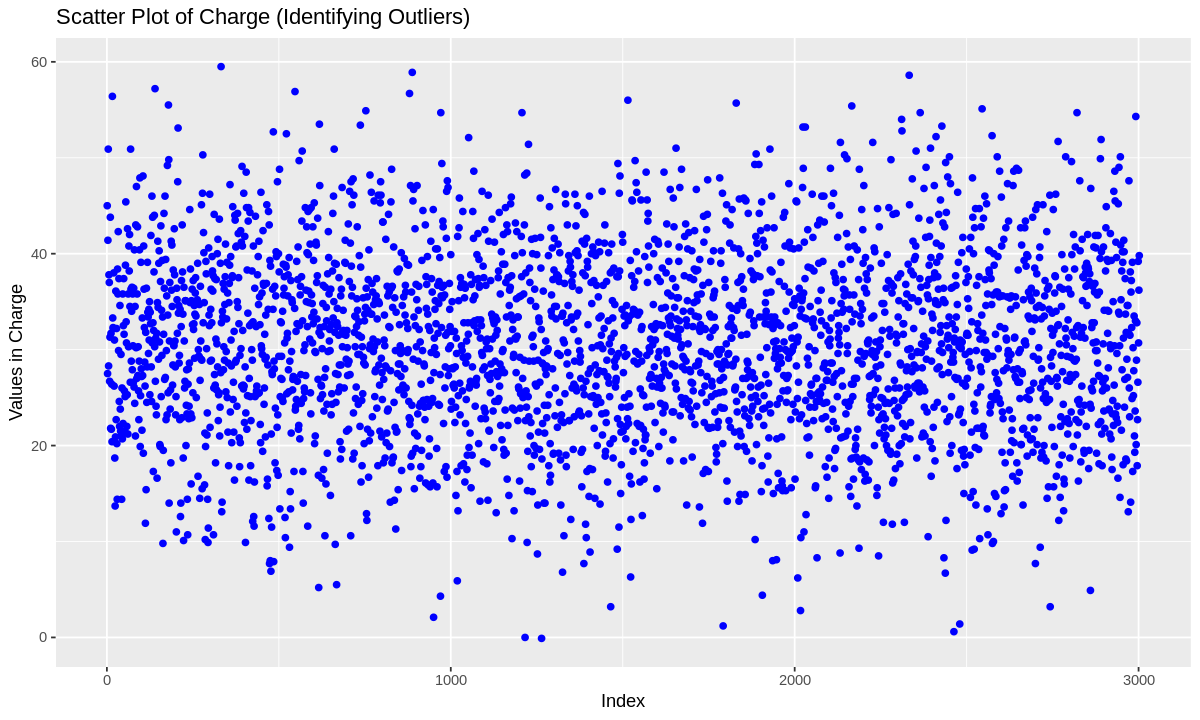

In [ ]:
library(ggplot2)
options(repr.plot.width = 10, repr.plot.height = 6)


ggplot(df_clean7, aes(x = 1:nrow(df_clean7), y = Day.Charge)) +
    geom_point(color = "blue") +
    xlab("Index") +
    ylab("Values in Charge") +
    ggtitle("Scatter Plot of Charge (Identifying Outliers)")

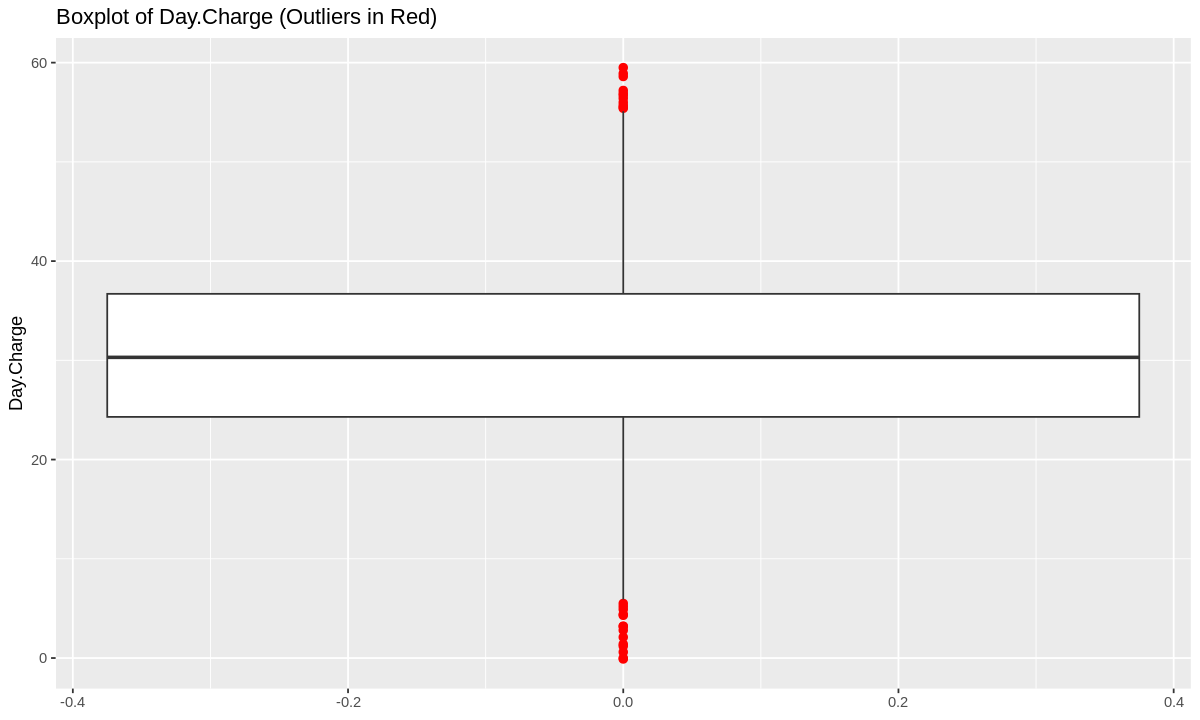

In [ ]:
ggplot(df_clean7, aes(y = Day.Charge)) +
    geom_boxplot(outlier.color = "red", outlier.size = 2) +
    ylab("Day.Charge") +
    ggtitle("Boxplot of Day.Charge (Outliers in Red)")

In [ ]:
plot_outliers <- boxplot.stats(df_clean7$Day.Charge)$out
print(plot_outliers)

 [1] 56.4 57.2 55.5 59.5 56.9  5.2  5.5 56.7 58.9  2.1  4.3  0.0 -0.1  3.2 56.0
[16]  1.2 55.7  4.4  2.8 55.4 58.6  0.6  1.4  3.2  4.9


#### b. Now we identify the outliers in the "Day Charge" column using the Z-score method.

In [ ]:
z_score_values <- (df_clean7$Day.Charge - day_charge_mean) / day_charge_sd
summary(z_score_values)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-3.28501 -0.66087 -0.01559  0.00000  0.67270  3.12476 

In [ ]:
z_score_outliers <- df_clean7$Day.Charge[z_score_values > 3 | z_score_values < -3]
print(z_score_outliers)

[1] 59.5 58.9  2.1  0.0 -0.1  1.2 58.6  0.6  1.4


#### c. Now we identify the outliers once again using the IQR method.

In [ ]:
Q1 <- quantile(df_clean7$Day.Charge, 0.25)
Q3 <- quantile(df_clean7$Day.Charge, 0.75)
IQR <- IQR(df_clean7$Day.Charge)

lower_bound <- Q1 - 1.5 * IQR
upper_bound <- Q3 + 1.5 * IQR

cat("lower bound:", lower_bound, "\n")
cat("upper bound:", upper_bound, "\n")

iqr_outliers <- df_clean7$Day.Charge[df_clean7$Day.Charge < lower_bound | df_clean7$Day.Charge > upper_bound]
print(iqr_outliers)

lower bound: 5.7 
upper bound: 55.3 
 [1] 56.4 57.2 55.5 59.5 56.9  5.2  5.5 56.7 58.9  2.1  4.3  0.0 -0.1  3.2 56.0
[16]  1.2 55.7  4.4  2.8 55.4 58.6  0.6  1.4  3.2  4.9


### 3. Data Normalization

#### a. We normalize the data in the "Night Mins" column using the min-max method.

In [ ]:
normalized_night_mins <- df_clean7$Night.Mins
night_mins_min <- min(normalized_night_mins)
night_mins_max <- max(normalized_night_mins)
normalized_night_mins <- (normalized_night_mins - night_mins_min) / night_mins_max
print(normalized_night_mins)

   [1] 0.56087067 0.58491521 0.35256897 0.43912933 0.41457859 0.45709947
   [7] 0.47911921 0.47684131 0.48671222 0.76689446 0.46975449 0.43735763
  [13] 0.29840547 0.43543433 0.45507466 0.34725386 0.16704632 0.26879271
  [19] 0.36016198 0.42900532 0.46950139 0.40116426 0.42090610 0.54036953
  [25] 0.57529739 0.40344217 0.19944318 0.40015186 0.39306505 0.57529739
  [31] 0.56416097 0.68286510 0.65021514 0.48139711 0.32751202 0.26803341
  [37] 0.51708428 0.19843078 0.41786889 0.41609719 0.25006328 0.72918249
  [43] 0.39255885 0.61250316 0.35358137 0.28195394 0.11971653 0.54011643
  [49] 0.57124779 0.65679575 0.45709947 0.29739307 0.26980511 0.41989370
  [55] 0.36193369 0.29081245 0.61326247 0.34345735 0.48266262 0.33991395
  [61] 0.26853961 0.33004303 0.31688180 0.68843331 0.58542141 0.37762592
  [67] 0.32649962 0.40015186 0.62515819 0.39028094 0.32672950 0.50746646
  [73] 0.64591243 0.38547203 0.42520881 0.75828904 0.42039990 0.40268287
  [79] 0.56106232 0.46975449 0.20457138 0.43710453 

#### b. We standardize the data in the "Night Mins" column using the Z-score method.

In [ ]:
standardized_night_mins <- df_clean7$Night.Mins
standardized_night_mins <- (standardized_night_mins - night_mins_mean) / night_mins_sd
print(standardized_night_mins)

   [1]  0.8677198377  1.0552698024 -0.7570551199 -0.0818752469 -0.2733736319
   [6]  0.0582936741  0.2300499576  0.2122820662  0.2892762623  2.4747269040
  [11]  0.1570041819 -0.0956947180 -1.1795360931 -0.1106966604  0.0424999929
  [16] -0.7985135332 -2.2041511636 -1.4105186813 -0.6978288153 -0.1608436531
  [21]  0.1550299717 -0.3780067702 -0.2240183781  0.7078088152  0.9802498166
  [26] -0.3602388788 -1.9514522638 -0.3859036108 -0.4411814951  0.9802498166
  [31]  0.8933845697  1.8192891325  1.5646160225  0.2478178490 -0.9525019253
  [36] -1.4164413117  0.5261814809 -1.9593491044 -0.2477088999 -0.2615283710
  [41] -1.5566102327  2.1805695909 -0.4451299154  1.2704587094 -0.7491582793
  [46] -1.3078597532 -2.5733284626  0.7058346050  0.9486624541  1.6159454865
  [51]  0.0582936741 -1.1874329337 -1.4026218406 -0.2319152187 -0.6840093442
  [56] -1.2387623978  1.2763813398 -0.8281266855  0.2576888998 -0.8557656277
  [61] -1.4124928914 -0.9327598237 -1.0354187518  1.8627217559  1.0592182228

#### c. Now we compare the results of both normalization methods using a graph. For that we should combine these two data and then plot them.

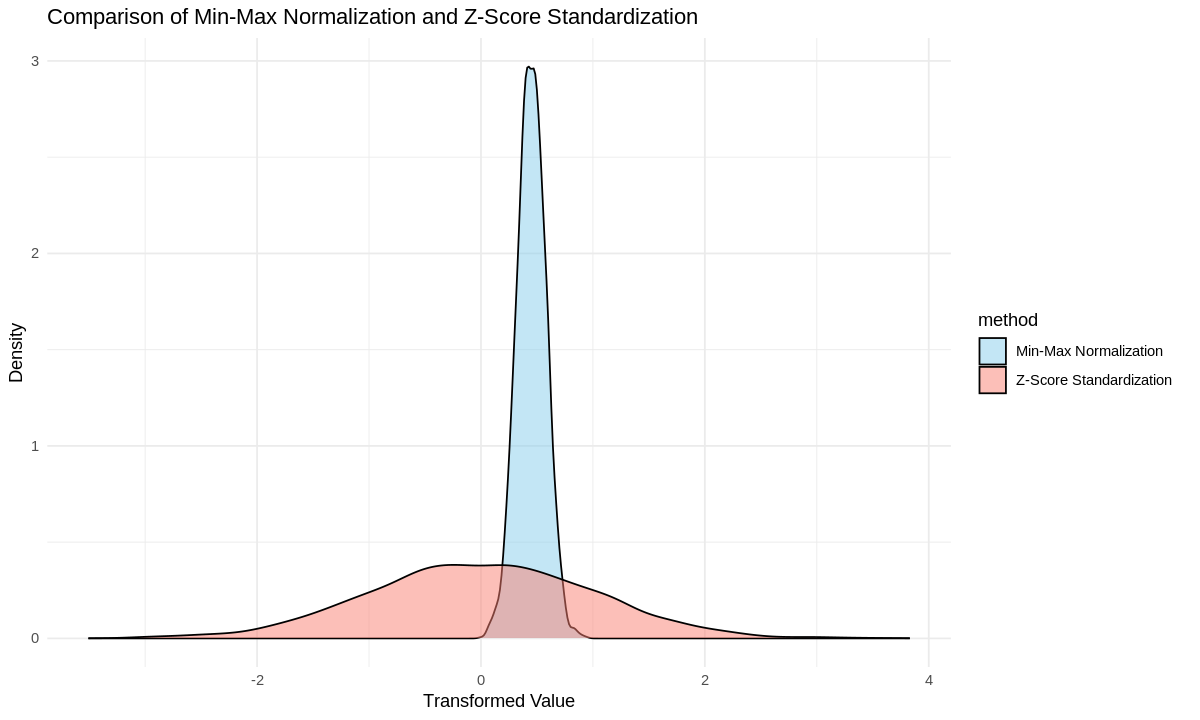

In [ ]:
df_long <- data.frame(
    value = c(normalized_night_mins, standardized_night_mins),
    method = rep(c("Min-Max Normalization", "Z-Score Standardization"), each = length(normalized_night_mins))
)

ggplot(df_long, aes(x = value, fill = method)) +
    geom_density(alpha = 0.5) +
    labs(title = "Comparison of Min-Max Normalization and Z-Score Standardization",
        x = "Transformed Value", y = "Density") +
    scale_fill_manual(values = c("skyblue", "salmon")) +
    theme_minimal()

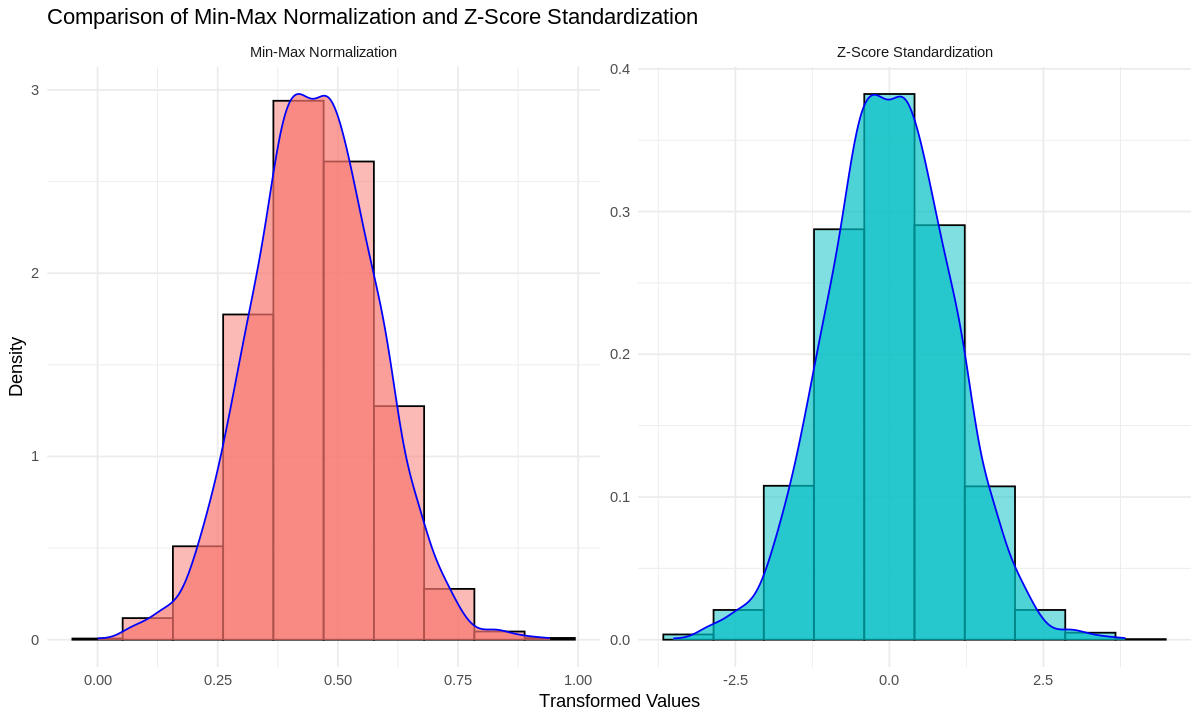

In [ ]:
ggplot(df_long, aes(x = value, fill = method)) +
    geom_histogram(aes(y = after_stat(density)), bins = 10, color = "black", alpha = 0.5) +
    geom_density(alpha = 0.7, color = "blue") +
    labs(title = "Comparison of Min-Max Normalization and Z-Score Standardization",
        x = "Transformed Values", y = "Density") +
    facet_wrap(~ method, scales = "free") +
    theme_minimal() +
    theme(legend.position = "none")

#### d. Now we calculate and compare the skewness of the data before and after applying both transformations.

In [ ]:
real_skewness <- 3 * (night_mins_mean - median(df_clean7$Night.Mins)) / night_mins_sd
normalized_skewness <- 3 * (mean(normalized_night_mins) - median(normalized_night_mins)) / sd(normalized_night_mins)
standardized_skewness <- 3 * (mean(standardized_night_mins) - median(standardized_night_mins)) / sd(standardized_night_mins)
cat("real skewness:", real_skewness, "\nnormalized skewness:", normalized_skewness, "\nstandardized skewness:", standardized_skewness, "\n")

real skewness: -0.03173837 
normalized skewness: -0.01578711 
standardized skewness: -0.01578711 


### 4. Normality Check

#### Finally we check the normality of the data in the "Eve Mins" column (only available values) using visualizations such as histograms or Q-Q plots.

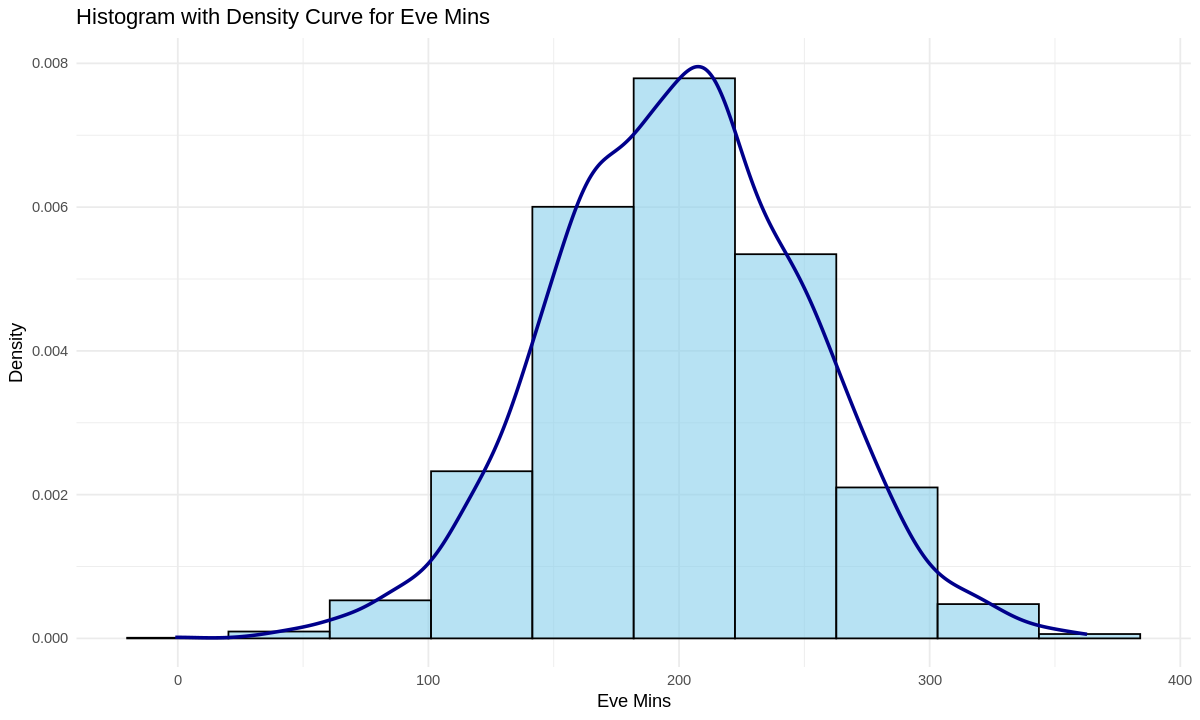

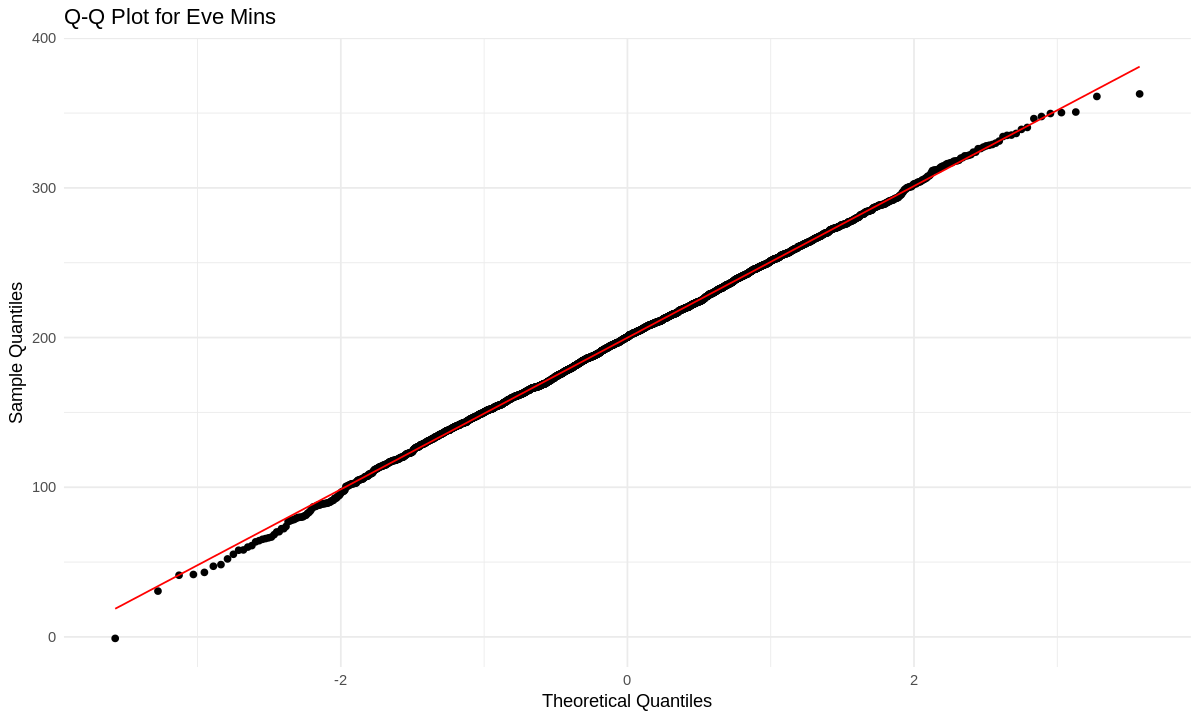

In [ ]:
eve_mins <- na.omit(df_clean7$Eve.Mins)

ggplot(data.frame(eve_mins), aes(x = eve_mins)) +
  geom_histogram(aes(y = after_stat(density)), bins = 10, color = "black", fill = "skyblue", alpha = 0.6) +
  geom_density(color = "darkblue", linewidth = 1) +
  labs(title = "Histogram with Density Curve for Eve Mins", x = "Eve Mins", y = "Density") +
  theme_minimal()

# Step 3: Q-Q Plot
ggplot(data.frame(eve_mins), aes(sample = eve_mins)) +
  stat_qq() +
  stat_qq_line(color = "red") +
  labs(title = "Q-Q Plot for Eve Mins", x = "Theoretical Quantiles", y = "Sample Quantiles") +
  theme_minimal()

It is shown that the data in eve minutes column is almost normal and has a normal distribution.